# Market Basket Analysis - Product Recommendation

<img src="MarketBasketAnalysis.png" width="700" height="200">

# Importing Data

In [54]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
#Reading data
df = pd.read_csv("retail.csv")
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [8]:
df.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [9]:
#Dropping 'Unnamed: 0' from df
df.drop('Unnamed: 0',axis=1,inplace = True)

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


# Exploratory Data Analysis

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779495 non-null  int64  
 1   StockCode    779495 non-null  object 
 2   Description  779495 non-null  object 
 3   Quantity     779495 non-null  int64  
 4   InvoiceDate  779495 non-null  object 
 5   Price        779495 non-null  float64
 6   Customer ID  779495 non-null  float64
 7   Country      779495 non-null  object 
 8   Revenue      779495 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 53.5+ MB


In [13]:
# Let's check if we have missing values or not
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64

Thus, we don't have missing values in the data

In [14]:
# Let's get some basic stats for all the numeric columns
df.describe()

,Invoice,Quantity,Price,Customer ID,Revenue
count,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,537427.005391,13.507085,3.218199,15320.262918,22.289821
std,26901.961110,146.540284,29.674823,1695.722988,227.416962
min,489434.000000,1.000000,0.000000,12346.000000,0.000000
25%,514483.000000,2.000000,1.250000,13971.000000,4.950000
50%,536754.000000,6.000000,1.950000,15246.000000,12.480000
75%,562002.000000,12.000000,3.750000,16794.000000,19.800000
max,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000


In [15]:
# Let's get some basic stats for all the columns with object type data
df.describe(include = "object")

,StockCode,Description,InvoiceDate,Country
count,779495,779495,779495,779495
unique,4631,5283,34591,41
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,United Kingdom
freq,5023,5016,542,700434


# Univariate Analysis

In [16]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [17]:
# Top 10 countries
Top_10_countries = df.Country.value_counts(normalize = True).head(10)*100
Top_10_countries

United Kingdom    89.857408
Germany            2.109058
EIRE               1.997062
France             1.733430
Netherlands        0.652987
Spain              0.469920
Belgium            0.392049
Switzerland        0.385634
Portugal           0.302247
Australia          0.229892
Name: Country, dtype: float64

As we can see above, almost 90% of the customers are from United Kingdom!

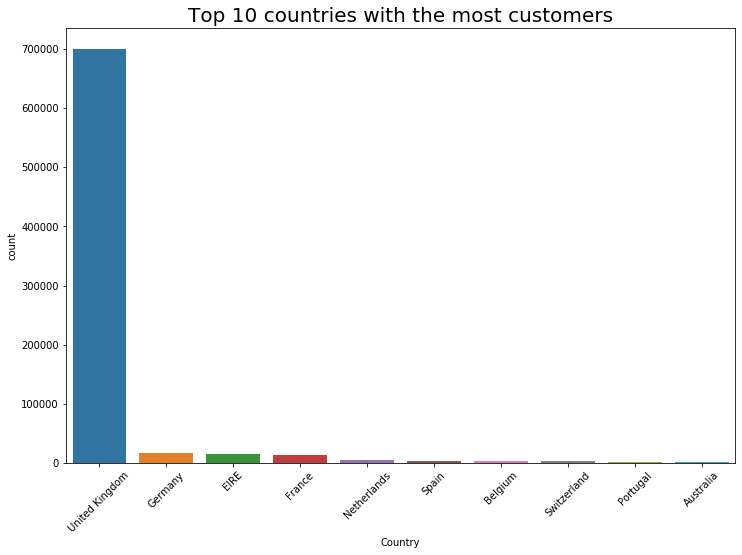

In [18]:
# Visualizing Top 10 countries 
plt.figure(figsize = (12,8))
sns.countplot(x='Country',data=df,order= df['Country'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title("Top 10 countries with the most customers",fontsize=20)
plt.show()

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [20]:
df.StockCode.nunique()

4631

In [21]:
df.Description.nunique()

5283

Here, we can the number of unique StockCode is less than the description. Therefore, we need to check for duplicates

In [22]:
duplicate_Check = df.groupby(["StockCode","Description"]).count().reset_index().sort_values('StockCode')
duplicate_StockCode = duplicate_Check[duplicate_Check.duplicated("StockCode")].sort_values('StockCode')
duplicate_StockCode.StockCode.value_counts().head(10)

22384    3
21955    3
22345    3
22344    3
23196    3
22346    3
23236    3
20685    3
23209    2
22416    2
Name: StockCode, dtype: int64

In [23]:
# Let's check the first three duplicates
duplicate_StockCode[(duplicate_StockCode.StockCode == '22344') | (duplicate_StockCode.StockCode == '22346') | (duplicate_StockCode.StockCode == '22345')]

,StockCode,Description,Invoice,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
1752,22344,PARTY PIZZA DISH PINK RETROSPOT,19,19,19,19,19,19,19
1751,22344,PARTY PIZZA DISH PINK POLKADOT,53,53,53,53,53,53,53
1753,22344,PARTY PIZZA DISH PINK WHITE SPOT,10,10,10,10,10,10,10
1756,22345,PARTY PIZZA DISH BLUE RETROSPOT,24,24,24,24,24,24,24
1757,22345,PARTY PIZZA DISH BLUE WHITE SPOT,8,8,8,8,8,8,8
1758,22345,PARTY PIZZA DISH BLUE+WHITE SPOT,2,2,2,2,2,2,2
1759,22346,PARTY PIZZA DISH GREEN POLKADOT,40,40,40,40,40,40,40
1760,22346,PARTY PIZZA DISH GREEN RETROSPOT,14,14,14,14,14,14,14
1761,22346,PARTY PIZZA DISH GREEN WHITE SPOT,7,7,7,7,7,7,7


Here, we can see there are multiple products with the same StockCode but the products are NOT DUPLICATES! They have slight variations.

In [24]:
duplicate_Check[duplicate_Check.duplicated(["StockCode","Description"])].sort_values('StockCode')

,StockCode,Description,Invoice,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue


Thus, we don't have duplicates in the data

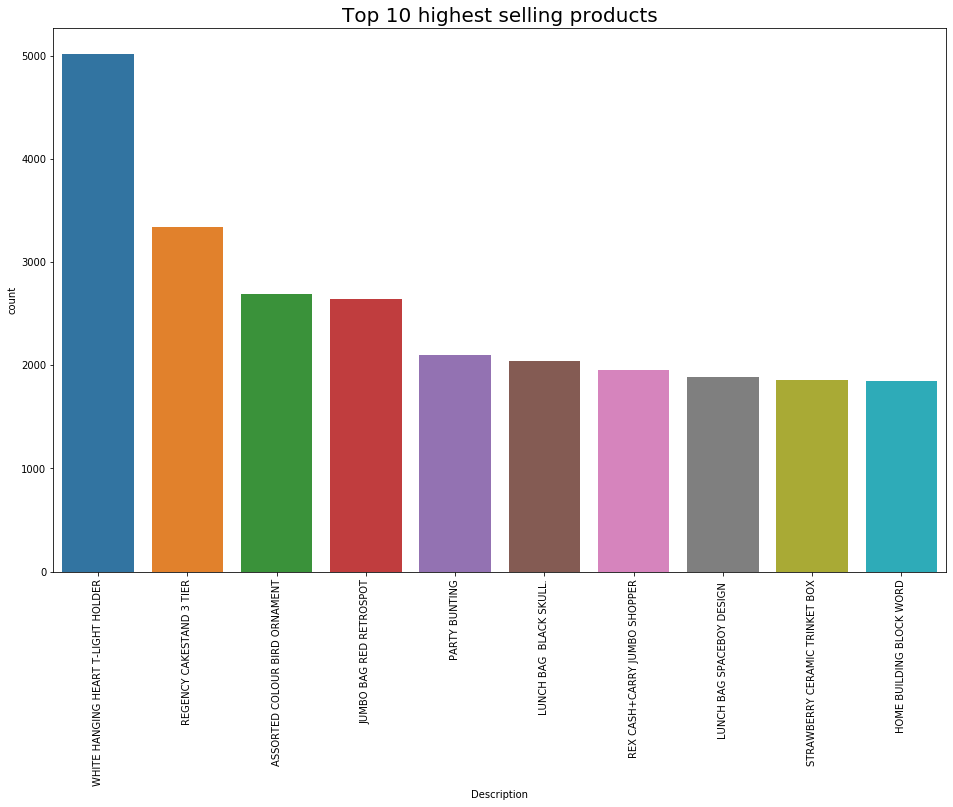

In [25]:
# Visualizing Top 10 highest selling products
plt.figure(figsize = (16,10))
sns.countplot(x='Description',data=df,order= df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 highest selling products",fontsize=20)
plt.show()

In [26]:
#Number of Customers
no_of_customers = df["Customer ID"].nunique()
print(f"Total number of customers are {no_of_customers}")

Total number of customers are 5881


In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


# Making the Basket of Products Frequently Sold Together

In [47]:
# Number of products brought in every order
order_size= df.groupby(['Invoice'])['Description'].size().reset_index()
order_size.sort_values('Description', ascending = False)

,Invoice,Description
34681,576339,542
35963,579196,533
36604,580727,529
35567,578270,442
33520,573576,435
...,...,...
5609,504535,1
12837,522932,1
12838,522934,1
12839,522936,1


In [35]:
order_size.describe()

,Invoice,Description
count,36975.000000,36975.000000
mean,536561.752265,21.081677
std,26580.252535,22.964145
min,489434.000000,1.000000
25%,513877.000000,6.000000
50%,536437.000000,15.000000
75%,559882.000000,27.000000
max,581587.000000,542.000000


Here, we can see that on an average 21 products are sold per order and the maximum number of products brought together by placing one order is 542.

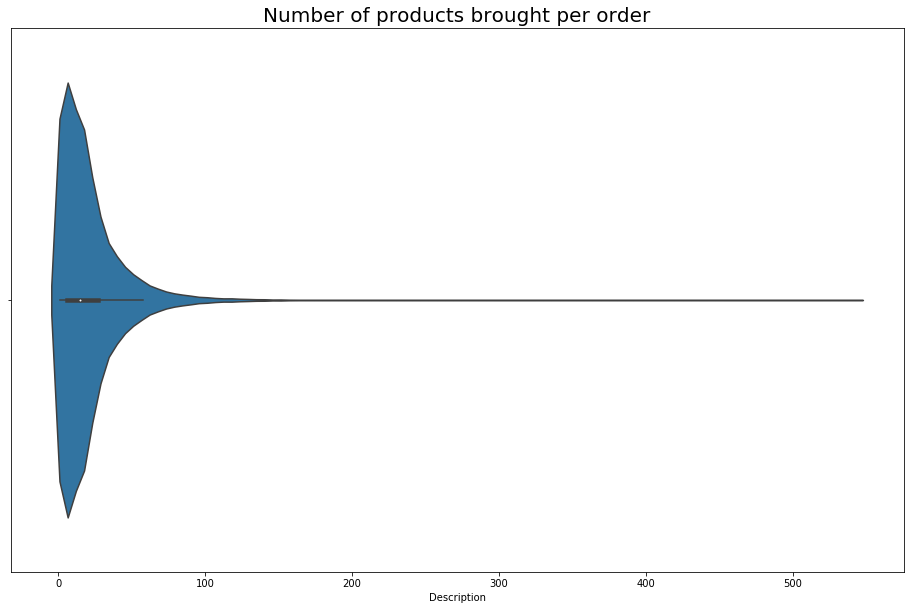

In [45]:
# Vizualizing orders
plt.figure(figsize = (16,10))
sns.violinplot('Description', data = order_size)
plt.title("Number of products brought per order", fontsize = 20)
plt.show()

With the help of the violinplot,we can see that in most of the orders around 10-20 products are brought together and very few orders have number of products greater than 100.

In [48]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


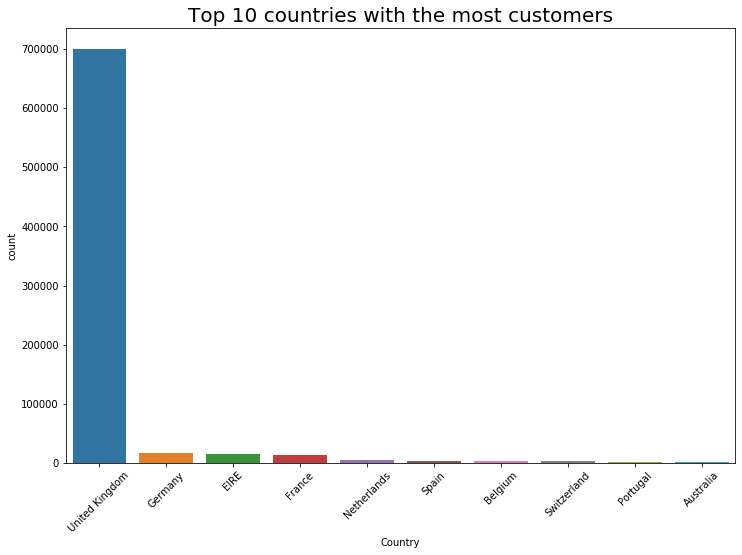

In [65]:
# Visualizing Top 10 countries 
plt.figure(figsize = (12,8))
sns.countplot(x='Country',data=df,order= df['Country'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title("Top 10 countries with the most customers",fontsize=20)
plt.show()

As we can see above, almost 90% of the data is related to orders from the United Kingdom. I'll be performing the analysis only for United Kingdom.

In [66]:
# Making the basket of products 
mybasket = (df[df['Country'] =="United Kingdom"].groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [68]:
#viewing transaction basket
mybasket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)

In [84]:
my_basket_sets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33546 entries, 489434 to 581586
Columns: 5249 entries,   DOORMAT UNION JACK GUNS AND ROSES to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: uint8(5249)
memory usage: 168.2 MB


In [86]:
my_basket_sets = my_basket_sets.astype(np.uint8)
my_basket_sets

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building the Market Basket Model

In [91]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.015, use_colnames=True)

In [95]:
#generating rules
rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [96]:
#viewing top 50 rules
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.047249,0.031569,0.015382,0.325552,10.312530,0.013890,1.435888
1,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.031569,0.047249,0.015382,0.487252,10.312530,0.013890,1.858129
2,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 DINOSAUR CAKE CASES),0.047249,0.030048,0.015561,0.329338,10.960275,0.014141,1.446259
3,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.030048,0.047249,0.015561,0.517857,10.960275,0.014141,1.976077
4,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.041793,0.047249,0.019555,0.467903,9.903012,0.017581,1.790560
5,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047249,0.041793,0.019555,0.413880,9.903012,0.017581,1.634830
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027365,0.029810,0.018124,0.662309,22.217830,0.017309,2.873015
7,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.029810,0.027365,0.018124,0.608000,22.217830,0.017309,2.481211
8,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.140136,0.074644,0.018542,0.132312,1.772583,0.008081,1.066462
9,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.074644,0.140136,0.018542,0.248403,1.772583,0.008081,1.144049


In [99]:
# Viewing the top 20 combinations of products that can be recommended to customers with the highest condidence
recommend_products = rules.sort_values('confidence',ascending=False)
recommend_products.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019734,0.024683,0.016395,0.830816,33.660077,0.015908,5.764823
75,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.019734,0.027425,0.015710,0.796073,29.027226,0.015169,4.769219
19,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.024683,0.027425,0.019615,0.794686,28.976670,0.018938,4.737012
11,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.021076,0.026680,0.016217,0.769448,28.840129,0.015654,4.221702
18,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.027425,0.024683,0.019615,0.715217,28.976670,0.018938,3.424779
77,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.046205,0.140136,0.032612,0.705806,5.036584,0.026137,2.922784
78,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.032701,0.049395,0.022536,0.689152,13.951902,0.020921,3.058105
16,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024683,0.019734,0.016395,0.664251,33.660077,0.015908,2.919641
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027365,0.029810,0.018124,0.662309,22.217830,0.017309,2.873015
39,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.029422,0.071275,0.018422,0.626140,8.784812,0.016325,2.484150


Thus, we can recommend these combination of products to customers as they have a high confidence, support and lift.